In [2]:
import pandas as pd
df = pd.read_csv("data/processed/dataset_complet_30min.csv")
df.head()

,time,Y_production,GHI_Bordeaux,DNI_Bordeaux,DHI_Bordeaux,T_Bordeaux,WS_Bordeaux,Cloud_Bordeaux,GHI_Marseille,DNI_Marseille,...,GHI_Paris,DNI_Paris,DHI_Paris,T_Paris,WS_Paris,Cloud_Paris,hour_sin,hour_cos,month_sin,month_cos
0,2018-01-01 00:00:00+00:00,-0.5,0.0,0.0,0.0,9.1,21.60,53.0,0.0,0.0,...,0.0,0.0,0.0,8.3,30.7,0.0,0.000000,1.000000,0.5,0.866025
1,2018-01-01 00:30:00+00:00,-0.5,0.0,0.0,0.0,9.2,21.10,39.5,0.0,0.0,...,0.0,0.0,0.0,8.1,30.4,29.5,0.000000,1.000000,0.5,0.866025
2,2018-01-01 01:00:00+00:00,-0.5,0.0,0.0,0.0,9.3,20.60,26.0,0.0,0.0,...,0.0,0.0,0.0,7.9,30.1,59.0,0.258819,0.965926,0.5,0.866025
3,2018-01-01 01:30:00+00:00,-0.5,0.0,0.0,0.0,9.1,20.25,61.5,0.0,0.0,...,0.0,0.0,0.0,7.9,30.0,54.0,0.258819,0.965926,0.5,0.866025
4,2018-01-01 02:00:00+00:00,-0.5,0.0,0.0,0.0,8.9,19.90,97.0,0.0,0.0,...,0.0,0.0,0.0,7.9,29.9,49.0,0.500000,0.866025,0.5,0.866025


In [4]:
df.columns
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105155 entries, 0 to 105154
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   time             105155 non-null  object 
 1   Y_production     105155 non-null  float64
 2   GHI_Bordeaux     105155 non-null  float64
 3   DNI_Bordeaux     105155 non-null  float64
 4   DHI_Bordeaux     105155 non-null  float64
 5   T_Bordeaux       105155 non-null  float64
 6   WS_Bordeaux      105155 non-null  float64
 7   Cloud_Bordeaux   105155 non-null  float64
 8   GHI_Marseille    105155 non-null  float64
 9   DNI_Marseille    105155 non-null  float64
 10  DHI_Marseille    105155 non-null  float64
 11  T_Marseille      105155 non-null  float64
 12  WS_Marseille     105155 non-null  float64
 13  Cloud_Marseille  105155 non-null  float64
 14  GHI_Lyon         105155 non-null  float64
 15  DNI_Lyon         105155 non-null  float64
 16  DHI_Lyon         105155 non-null  floa

In [5]:
df['time'] = pd.to_datetime(df['time'])
df[['time']].head()


,time
0,2018-01-01 00:00:00+00:00
1,2018-01-01 00:30:00+00:00
2,2018-01-01 01:00:00+00:00
3,2018-01-01 01:30:00+00:00
4,2018-01-01 02:00:00+00:00


In [6]:
print("Début :", df['time'].min())
print("Fin   :", df['time'].max())


Début : 2018-01-01 00:00:00+00:00
Fin   : 2023-12-31 23:00:00+00:00


In [7]:
df = df.sort_values('time')

df['delta_min'] = df['time'].diff().dt.total_seconds() / 60

df['delta_min'].value_counts().head()


delta_min
30.0    105148
90.0         6
Name: count, dtype: int64

In [8]:
df.describe()


,Y_production,GHI_Bordeaux,DNI_Bordeaux,DHI_Bordeaux,T_Bordeaux,WS_Bordeaux,Cloud_Bordeaux,GHI_Marseille,DNI_Marseille,DHI_Marseille,...,DNI_Paris,DHI_Paris,T_Paris,WS_Paris,Cloud_Paris,hour_sin,hour_cos,month_sin,month_cos,delta_min
count,105155.000000,105155.000000,105155.000000,105155.000000,105155.000000,105155.000000,105155.000000,105155.000000,105155.000000,105155.000000,...,105155.000000,105155.000000,105155.000000,105155.000000,105155.000000,1.051550e+05,1.051550e+05,1.051550e+05,1.051550e+05,105154.000000
mean,851.707470,156.596434,181.840327,57.552755,14.510989,10.816425,58.138733,187.749456,243.601236,52.191127,...,166.578652,54.666121,12.673821,13.264429,62.028767,2.461310e-06,-1.233030e-04,-4.885167e-03,-2.210217e-03,30.003424
std,1270.509811,228.716123,266.718201,78.207594,7.059454,5.595896,39.848920,262.167975,310.863053,67.619027,...,256.250506,75.674051,7.209525,6.833862,39.249842,7.071534e-01,7.070669e-01,7.057033e-01,7.084939e-01,0.453214
min,-11.500000,0.000000,0.000000,0.000000,-5.300000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,-10.000000,0.000000,0.000000,-1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,30.000000
25%,0.000000,0.000000,0.000000,0.000000,9.500000,6.900000,15.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,7.500000,8.000000,22.000000,-7.071068e-01,-7.071068e-01,-8.660254e-01,-8.660254e-01,30.000000
50%,17.000000,11.000000,3.200000,8.000000,14.000000,9.500000,68.000000,15.500000,14.250000,10.500000,...,0.000000,8.000000,12.150000,12.000000,78.000000,1.224647e-16,-1.836970e-16,-2.449294e-16,-1.836970e-16,30.000000
75%,1478.500000,264.500000,327.150000,101.000000,19.300000,13.600000,99.000000,338.000000,533.800000,98.000000,...,275.100000,94.000000,17.800000,17.250000,100.000000,7.071068e-01,7.071068e-01,5.000000e-01,8.660254e-01,30.000000
max,6697.500000,950.000000,937.400000,440.000000,40.500000,52.900000,100.000000,959.000000,952.600000,429.000000,...,940.200000,410.000000,40.800000,50.700000,100.000000,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,90.000000


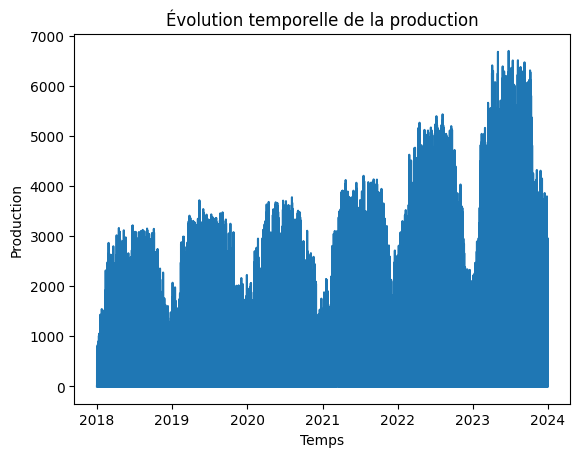

In [9]:
import matplotlib.pyplot as plt

plt.figure()
plt.plot(df['time'], df['Y_production'])
plt.title("Évolution temporelle de la production")
plt.xlabel("Temps")
plt.ylabel("Production")
plt.show()


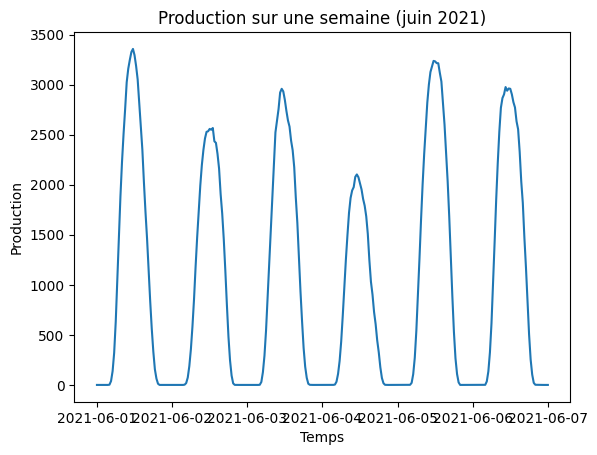

In [10]:
# Sélection d'une semaine
df_week = df[(df['time'] >= '2021-06-01') & (df['time'] <= '2021-06-07')]

plt.figure()
plt.plot(df_week['time'], df_week['Y_production'])
plt.title("Production sur une semaine (juin 2021)")
plt.xlabel("Temps")
plt.ylabel("Production")
plt.show()


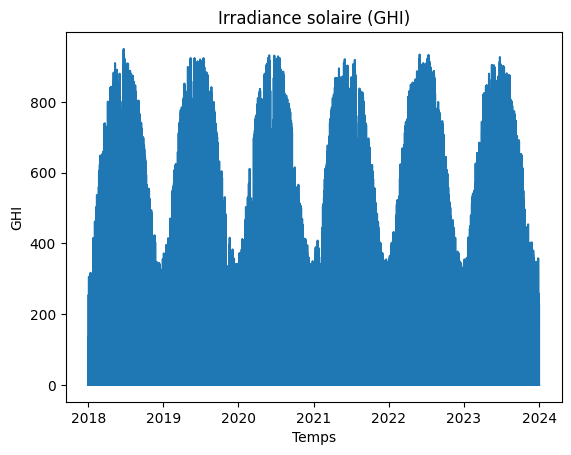

In [11]:
plt.figure()
plt.plot(df['time'], df['GHI_Bordeaux'])
plt.title("Irradiance solaire (GHI)")
plt.xlabel("Temps")
plt.ylabel("GHI")
plt.show()


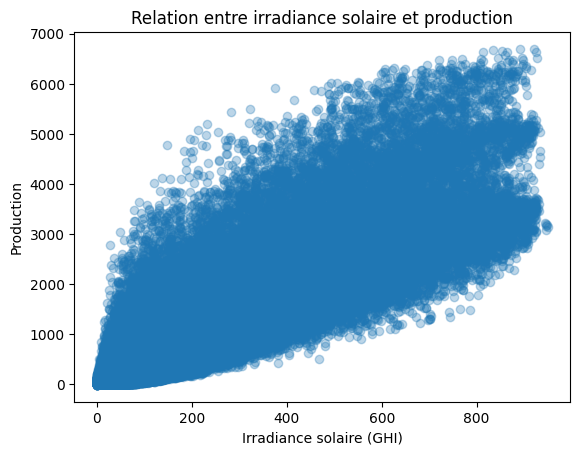

In [12]:
plt.figure()
plt.scatter(df['GHI_Bordeaux'], df['Y_production'], alpha=0.3)
plt.xlabel("Irradiance solaire (GHI)")
plt.ylabel("Production")
plt.title("Relation entre irradiance solaire et production")
plt.show()


La production solaire est fortement corrélée à l’irradiance solaire, ce qui justifie l’utilisation de variables météorologiques comme variables explicatives.

In [13]:
# Sélection des colonnes numériques principales
cols = [
    'Y_production',
    'GHI_Bordeaux',
    'DNI_Bordeaux',
    'DHI_Bordeaux',
    'T_Bordeaux',
    'WS_Bordeaux'
]

df_corr = df[cols].corr()
df_corr


,Y_production,GHI_Bordeaux,DNI_Bordeaux,DHI_Bordeaux,T_Bordeaux,WS_Bordeaux
Y_production,1.000000,0.897233,0.766162,0.782489,0.488588,0.016143
GHI_Bordeaux,0.897233,1.000000,0.889706,0.783035,0.564009,0.044650
DNI_Bordeaux,0.766162,0.889706,1.000000,0.538376,0.484670,0.009496
DHI_Bordeaux,0.782489,0.783035,0.538376,1.000000,0.450988,0.103659
T_Bordeaux,0.488588,0.564009,0.484670,0.450988,1.000000,-0.024214
WS_Bordeaux,0.016143,0.044650,0.009496,0.103659,-0.024214,1.000000


L’irradiance solaire globale (GHI) présente la corrélation la plus forte avec la production, confirmant son rôle de variable explicative principale.

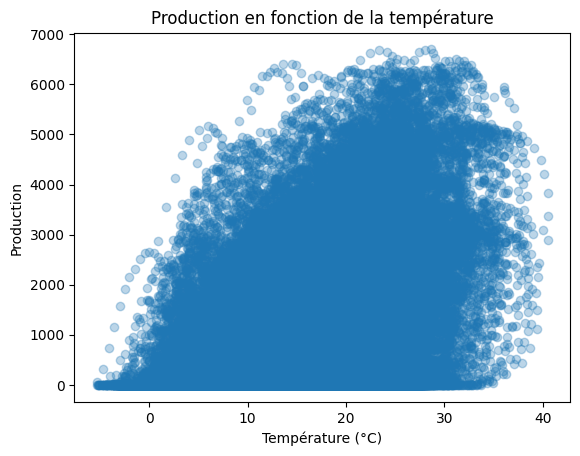

In [14]:
plt.figure()
plt.scatter(df['T_Bordeaux'], df['Y_production'], alpha=0.3)
plt.xlabel("Température (°C)")
plt.ylabel("Production")
plt.title("Production en fonction de la température")
plt.show()


La température seule n’explique pas directement la production, mais peut jouer un rôle secondaire via les conditions météorologiques.

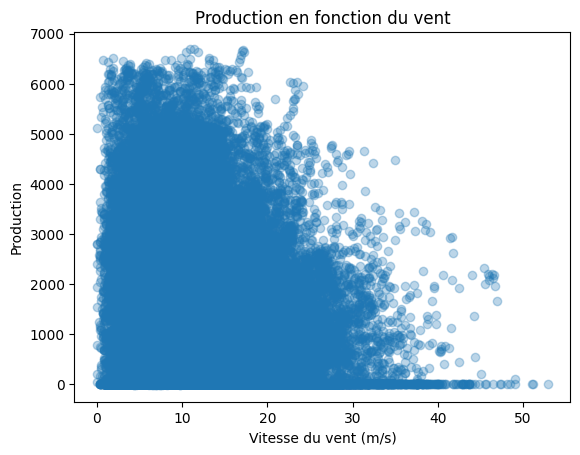

In [15]:
plt.figure()
plt.scatter(df['WS_Bordeaux'], df['Y_production'], alpha=0.3)
plt.xlabel("Vitesse du vent (m/s)")
plt.ylabel("Production")
plt.title("Production en fonction du vent")
plt.show()


L’analyse exploratoire des données met en évidence une forte variabilité journalière de la production solaire, caractérisée par des valeurs nulles ou faibles durant la nuit et des pics en journée.

La production est fortement corrélée à l’irradiance solaire globale (GHI), confirmant le rôle central des variables météorologiques dans l’explication de la production photovoltaïque.

Les autres variables météorologiques, telles que la température ou la vitesse du vent, présentent une influence plus secondaire.

Ces observations justifient l’utilisation d’un modèle de Machine Learning explicatif basé principalement sur les variables météorologiques pour prédire la production solaire.